In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

import sys
sys.path.insert(0, '../')

In [2]:
from libra import Star, Spot, trappist1, transit_model

In [3]:
u1, u2 = trappist1('b').u

spots = [Spot.from_latlon(10, 0, 0.05),
         Spot.from_latlon(10, 120, 0.05), 
          Spot.from_latlon(10, 260, 0.05), 
          Spot.from_latlon(10, 300, 0.05),
          Spot.from_latlon(10, 49, 0.05)]

star = Star(u1=u1, u2=u2, rotation_period=3.3*u.day, 
            spots=spots)

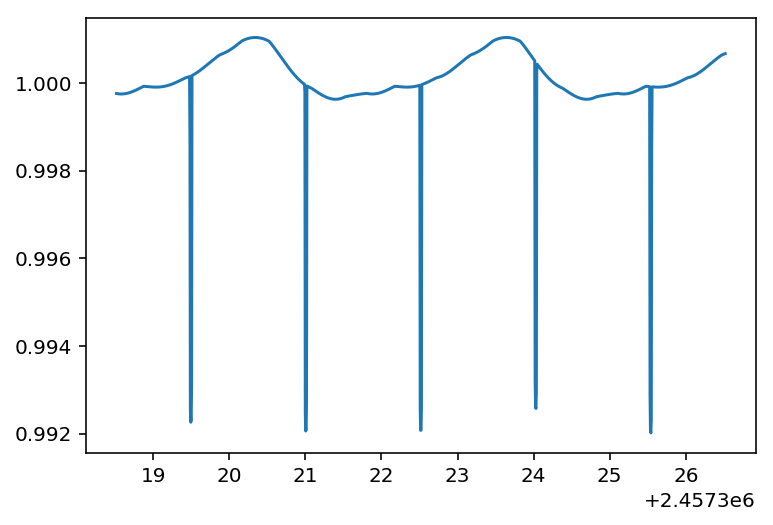

In [4]:
times = np.linspace(trappist1('b').t0 - 4, trappist1('b').t0 + 4, 1500)
# times = np.arange(trappist1('b').t0 - 0.05, trappist1('b').t0 + 0.05, 1/60/24)

stellar_flux = star.flux(times)
stellar_flux /= np.median(stellar_flux)

transit = transit_model(times, trappist1('b'))

model_flux = stellar_flux * transit

plt.plot(times, model_flux)

../libra/starspots/star.py:360: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1 - r**2)


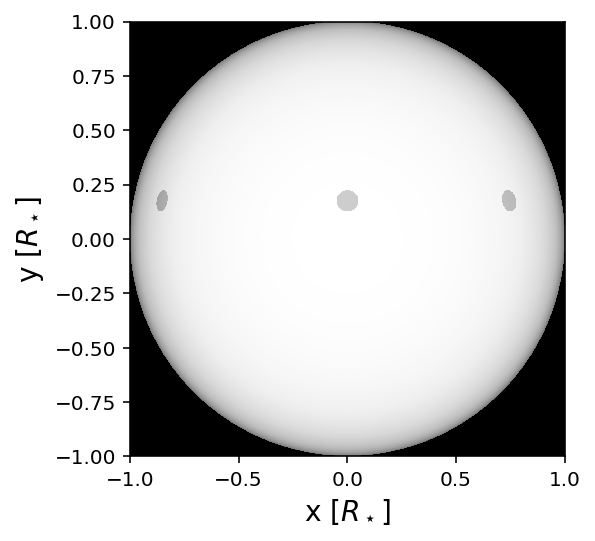

In [5]:
star.plot()

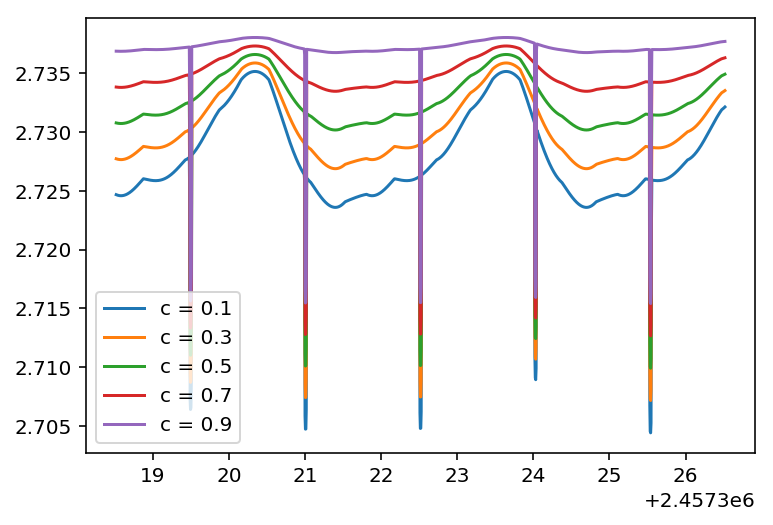

In [6]:
u1, u2 = trappist1('b').u

spots = [Spot.from_latlon(10, 0, 0.05),
         Spot.from_latlon(10, 120, 0.05), 
         Spot.from_latlon(10, 260, 0.05), 
         Spot.from_latlon(10, 300, 0.05),
         Spot.from_latlon(10, 49, 0.05)]

for c in np.linspace(0.1, 0.9, 5):
    star = Star(u1=u1, u2=u2, rotation_period=3.3*u.day, 
                spots=spots, contrast=c)

    times = np.linspace(trappist1('b').t0 - 4, trappist1('b').t0 + 4, 1500)
    # times = np.arange(trappist1('b').t0 - 0.05, trappist1('b').t0 + 0.05, 1/60/24)

    stellar_flux = star.flux(times)
    #stellar_flux /= np.median(stellar_flux)

    transit = transit_model(times, trappist1('b'))

    model_flux = stellar_flux * transit

    plt.plot(times, model_flux, label='c = {0:.1f}'.format(c))
plt.legend()

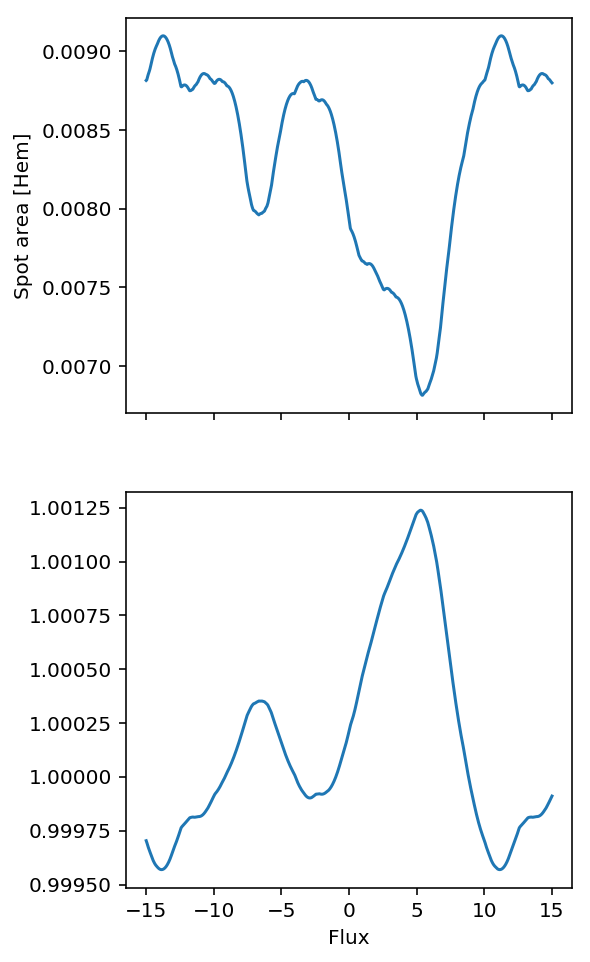

../libra/starspots/star.py:360: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1 - r**2)


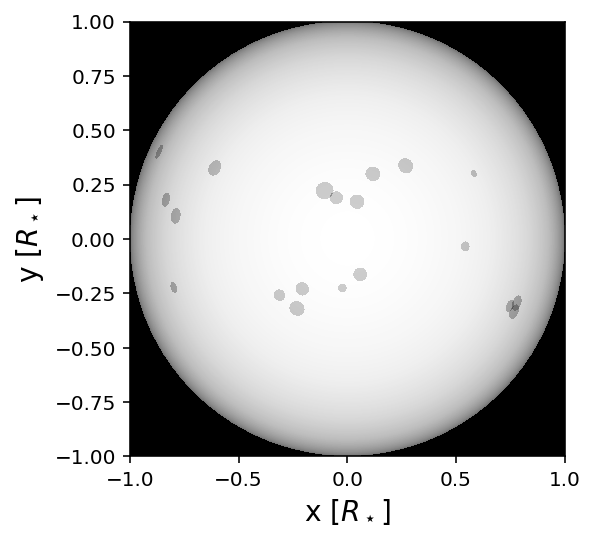

In [7]:
u1, u2 = trappist1('b').u

# spots = [Spot.from_latlon(10, 0, 0.05),
#          Spot.from_latlon(10, 120, 0.05), 
#          Spot.from_latlon(10, 140, 0.1)]

spots = [Spot.from_sunspot_distribution(radius_multiplier=5) for i in range(50)]

star = Star(rotation_period=25*u.day, 
            spots=spots, contrast=0.7)

times = np.linspace(-15, 15, 1500)

flux = star.flux(times)

area = star.spotted_area(times)
flux /= np.median(flux)

transit = transit_model(times, trappist1('b'))

fig, ax= plt.subplots(2, 1, figsize=(4, 8), sharex=True)

ax[0].plot(times, area, label='c = {0:.1f}'.format(c))
ax[1].plot(times, flux)

ax[0].set_ylabel('Spot area [Hem]')
ax[1].set_xlabel('Flux')
plt.legend()
plt.show()
star.plot()

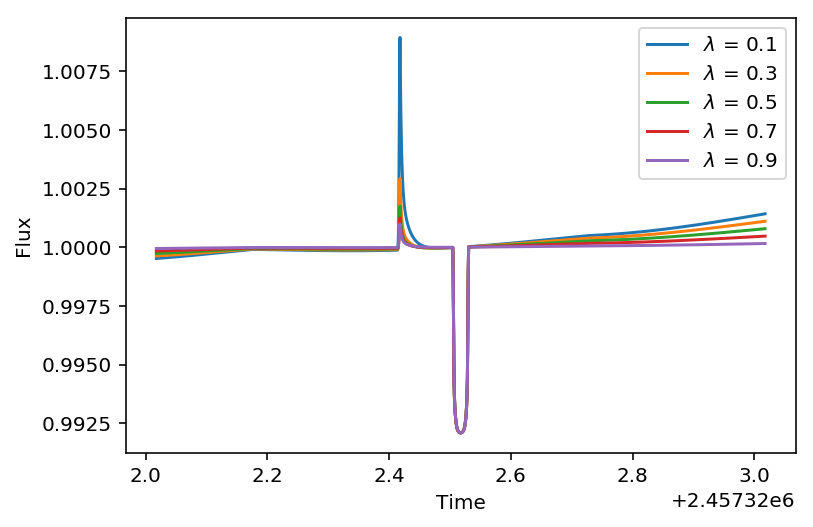

In [23]:
from libra import flare_flux

u1, u2 = trappist1('b').u

spots = [Spot.from_latlon(10, 0, 0.05),
         Spot.from_latlon(10, 120, 0.05), 
         Spot.from_latlon(10, 260, 0.05), 
         Spot.from_latlon(10, 300, 0.05),
         Spot.from_latlon(10, 49, 0.05)]

times = np.linspace(trappist1('b').t0 - 0.5, trappist1('b').t0 + 0.5, 1500)


for c in np.linspace(0.1, 0.9, 5):
    star = Star(u1=u1, u2=u2, rotation_period=3.3*u.day, 
                spots=spots, contrast=c)

    # times = np.arange(trappist1('b').t0 - 0.05, trappist1('b').t0 + 0.05, 1/60/24)

    stellar_flux = star.flux(times)
    stellar_flux /= np.median(stellar_flux)

    transit = transit_model(times, trappist1('b'))

    model_flux = stellar_flux * transit + flare_model / (10*c)

    plt.plot(times, model_flux, label='$\lambda$ = {0:.1f}'.format(c))
plt.legend()
plt.xlabel('Time')
plt.ylabel('Flux')
plt.savefig('example.pdf', bbox_inches='tight')